**STATISTICAL ANALYSIS FOR HEART FAILURE PREDICTION**

In [89]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px

**Extract data**

In [90]:
data=pd.read_csv("/Users/naveenvutukuri/Documents/Subjects /Emperical Analysis/heart_failure_clinical_records_dataset.csv")

In [91]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# **Preprocessing Data**

In [92]:
data['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [93]:
data['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [94]:
data['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [95]:
data['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

In [96]:
data['smoking'].value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [97]:
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

We perform 2 analysis, 
1. Univariante analysis
2. Bivarainte analysis

# 1. **UNIVARIATE ANALYSIS**

Text(0.5, 1.0, 'The No of Male and Female in The Dataset')

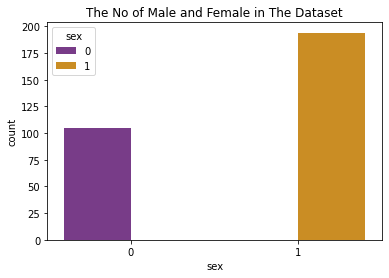

In [98]:
sns.countplot(x='sex',data=data,palette='CMRmap',hue='sex')
plt.title('The No of Male and Female in The Dataset')

The No of People who Smoke and Not Smoke


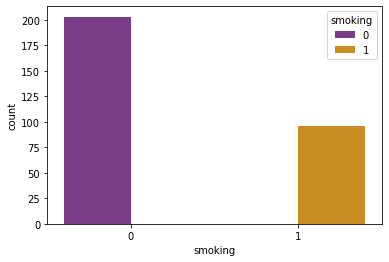

In [99]:
sns.countplot(x='smoking',data=data,hue='smoking',palette='CMRmap')
print('The No of People who Smoke and Not Smoke')

Text(0.5, 1.0, 'The No of People with Diabetes ans without Diabetes')

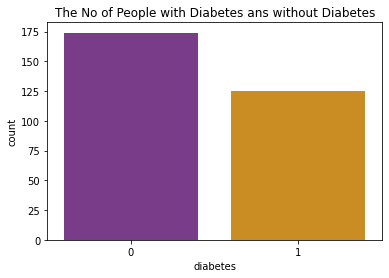

In [100]:
sns.countplot(x='diabetes',data=data,palette='CMRmap')
plt.title('The No of People with Diabetes ans without Diabetes')

Text(0.5, 1.0, 'The No of People with Hypertension and without Hypertension')

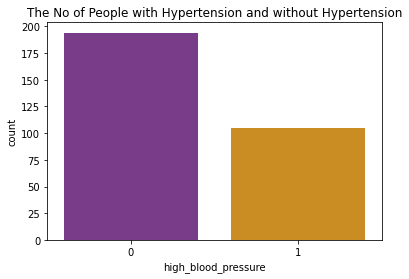

In [101]:
sns.countplot(x='high_blood_pressure',data=data,palette='CMRmap')
plt.title('The No of People with Hypertension and without Hypertension')

Text(0.5, 1.0, 'The No of People with Anaemia and without Anaemia')

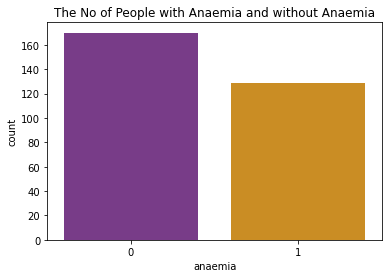

In [102]:
sns.countplot(x='anaemia',data=data,palette='CMRmap')
plt.title('The No of People with Anaemia and without Anaemia')

Text(0.5, 1.0, 'The People who died and not died')

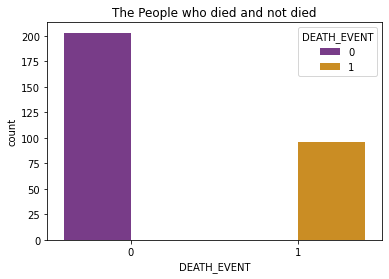

In [103]:
sns.countplot(x='DEATH_EVENT',data=data,hue='DEATH_EVENT',palette='CMRmap')
plt.title('The People who died and not died')

Text(0.5, 1.0, '% Diabetes')

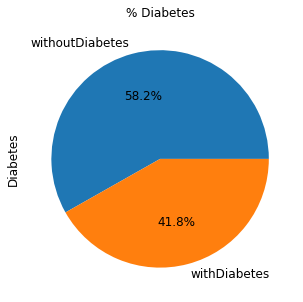

In [104]:
ax = (data['diabetes'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['withoutDiabetes', 'withDiabetes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Diabetes',fontsize = 12)
ax.set_title('% Diabetes', fontsize = 12)

Text(0.5, 1.0, '% Smoking')

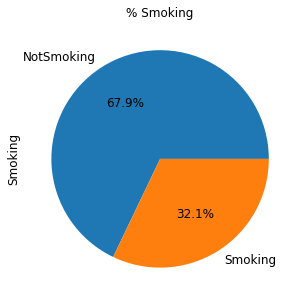

In [105]:
ax = (data['smoking'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['NotSmoking', 'Smoking'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Smoking',fontsize = 12)
ax.set_title('% Smoking', fontsize = 12)

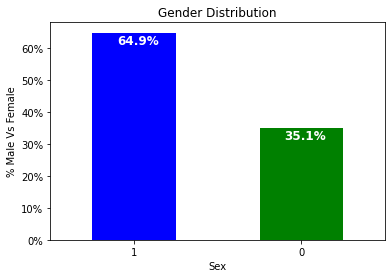

In [106]:
colors = ['blue','green']
ax = (data['sex'].value_counts()*100.0 /len(data)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Male Vs Female')
ax.set_xlabel('Sex')

ax.set_title('Gender Distribution')
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

In [107]:
fig=px.histogram(data,
                'age',
                nbins=50,
                color='age',
                title=' Patients Age Distribution',
                height=500,
                width=600
                )
fig.show()

In [108]:
fig=px.histogram(data,
                'serum_sodium',
                nbins=50,
                color='DEATH_EVENT',
                title='SERUM SODIUM DISTRIBUTION',
                height=500,
                width=600
                )
fig.show()

In [109]:
fig=px.histogram(data,
                'platelets',
                nbins=50,
                color='DEATH_EVENT',
                title='PLATELETS DISTRIBUTION',
                height=500,
                width=600
                )
fig.show()

# **2. BIVARIATE ANALYSIS**

In [112]:
fig=px.box(data,
          x='DEATH_EVENT',
          y='platelets',
          points='all',
          height=600,
          width=800,
          title='Smoking v/s DEATH_EVENT PLOT')
fig.show()

In [113]:
fig=px.box(data,
          y='age',
          x='DEATH_EVENT',
          points='all',
          height=600,
          width=800,
          title='Age v/s DEATH_EVENT Distribution')
fig.show()

In [114]:
X=data.drop('DEATH_EVENT',axis=1)
y=data['DEATH_EVENT']

In [115]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [116]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

# Training - Testing -Spliting  of data

In [117]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X=scale.fit_transform(X)


In [118]:
X.shape

(299, 12)

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [121]:
X_train.shape

(209, 12)

In [122]:
X_tr=X_train[:150]
X_va=X_train[150:]
Y_tr=Y_train[:150]
Y_va=Y_train[150:]

In [123]:
X_tr.shape

(150, 12)

In [124]:
X_va.shape

(59, 12)

In [125]:
Y_tr.shape

(150,)

In [126]:
Y_va.shape

(59,)

In [127]:
X_test.shape

(90, 12)

In [128]:
Y_test.shape

(90,)

In [129]:
X_train

array([[0.09090909, 0.        , 0.07131921, ..., 0.        , 0.        ,
        0.20996441],
       [0.16363636, 1.        , 0.00727226, ..., 0.        , 0.        ,
        0.02846975],
       [0.36363636, 1.        , 0.09326359, ..., 1.        , 0.        ,
        0.30960854],
       ...,
       [0.81818182, 0.        , 0.74751212, ..., 1.        , 1.        ,
        0.24199288],
       [0.76363636, 1.        , 0.04541975, ..., 1.        , 0.        ,
        0.03202847],
       [0.45454545, 0.        , 0.07131921, ..., 0.        , 0.        ,
        0.48398577]])

# ModelBuilding

# 1. Logistic Regression
# 2. Decision Tree

In [130]:

from sklearn.metrics import accuracy_score

# 1. DecisionTree

In [131]:
from sklearn.tree import DecisionTreeClassifier
decisiontree=DecisionTreeClassifier(criterion='gini',max_depth=4)

In [132]:
decisiontree.fit(X_tr,Y_tr)

DecisionTreeClassifier(max_depth=4)

In [133]:
pred_dec_tr=decisiontree.predict(X_tr)

# TrainAccuracy

In [134]:
accuracy_score(Y_tr,pred_dec_tr)

0.9466666666666667

# CrossValidation

In [135]:
from sklearn.model_selection import cross_val_score
cross_val_score(decisiontree,X_tr,Y_tr,cv=10).mean()

0.7733333333333334

In [136]:
pred_dec_va=decisiontree.predict(X_va)

# Val_accuracy

In [137]:
accuracy_score(Y_va,pred_dec_va)

0.711864406779661

In [138]:
pred_dec_test=decisiontree.predict(X_test)

# Test Accuracy

In [139]:
accuracy_score(Y_test,pred_dec_test)

0.8777777777777778

# Confusion Matrix For Decision Tree

<AxesSubplot:>

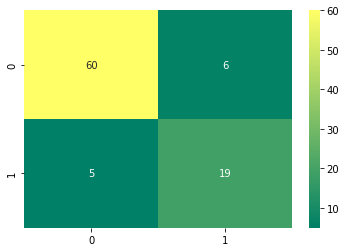

In [140]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test,pred_dec_test),annot=True,cmap='summer')

#2.  LogisticRegression

In [141]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [142]:
log.fit(X_tr,Y_tr)

LogisticRegression()

In [143]:
log_pred_tr=log.predict(X_tr)

In [144]:
accuracy_score(Y_tr,log_pred_tr)

0.86

In [145]:
cross_val_score(decisiontree,X_tr,Y_tr,cv=10).mean()

0.7733333333333334

In [146]:
log_pred_va=log.predict(X_va)

In [147]:
accuracy_score(Y_va,log_pred_va)

0.711864406779661

In [148]:
log_pred_te=log.predict(X_test)

In [149]:
accuracy_score(Y_test,log_pred_te)

0.8666666666666667

# Confusion Matrix for Logistic Regression

<AxesSubplot:>

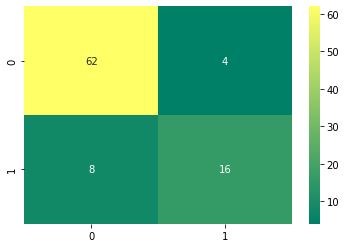

In [150]:
sns.heatmap(confusion_matrix(Y_test,log_pred_te),annot=True,cmap='summer')

#  Statistical Analysis

# 1. One sample T- test
# 2. Two Samaple Unpaired T- Test
# 3. Fishers Exact table
# 4. Two Samaple Paired T- Test

In [151]:
import scipy

In [152]:
# H0(NullHypothesis):if the sample mean is equal to populationmean
# H1(Alternate Hypothesis):if the Sample mean is not equal to PopulationMean
# IF p value >= Significance value we fail to reject the null hypothesis
#If p value < Sigficance value we accept the alternate Hypothesis

# 1. One sample t test

In [153]:
male_age=data.loc[data.sex==1,'age']

In [154]:
male_age.mean()

61.4055

In [155]:
scipy.stats.ttest_1samp(male_age,popmean=60)

Ttest_1sampResult(statistic=1.6014139978952975, pvalue=0.11092074578307773)

In [156]:
female_age=data.loc[data.sex==0,'age']
female_age.mean()

59.777780952380944

In [157]:
scipy.stats.ttest_1samp(female_age,popmean=60)

Ttest_1sampResult(statistic=-0.20256952029853986, pvalue=0.8398672748505357)

In [158]:
# H0(NullHypothesis):if the mean of two sample are equal to populationmean
# H1(Alternate Hypothesis):if the mean of two samples is not equal to PopulationMean
# IF p value >= Significance value we fail to reject the null hypothesis
#If p value < Sigficance value we accept the alternate Hypothesis

# 2. Two sample unpaired t test

In [159]:
male=data.loc[data.sex==1,'platelets' ]

In [160]:
female=data.loc[data.sex==0,'platelets']

In [161]:
scipy.stats.ttest_ind(male,female)

Ttest_indResult(statistic=-2.1733666381904304, pvalue=0.03054272778909673)

In [162]:
male_ejectionfraction=data.loc[data.sex==1,'ejection_fraction']

In [163]:
female_ejectionfraction=data.loc[data.sex==0,'ejection_fraction']

In [164]:
scipy.stats.ttest_ind(male_ejectionfraction,female_ejectionfraction)

Ttest_indResult(statistic=-2.585864165814152, pvalue=0.010189690578840916)

# 3. FishersExactTable

In [180]:
table2=pd.crosstab(data['sex'],data['high_blood_pressure'])


In [181]:
oddsratio, pvalue = scipy.stats.fisher_exact(table2, alternative='two-sided')

In [182]:
print('Fisher exact test p-value: {:.4f}'.format(pvalue))

Fisher exact test p-value: 0.0766


In [183]:
table3=pd.crosstab(data['sex'],data['diabetes'])

In [184]:
oddsratio, pvalue = scipy.stats.fisher_exact(table3, alternative='two-sided')

In [185]:
print('Fisher exact test p-value: {:.4f}'.format(pvalue))

Fisher exact test p-value: 0.0071


# 4. Two sample paired T- test

In [173]:
male=data.loc[data.sex==1,'age' ]

In [174]:
male1=male[:97]
male1.shape

(97,)

In [175]:
male2=male[97:]
male2.shape

(97,)

In [176]:
scipy.stats.ttest_rel(male1,male2)

Ttest_relResult(statistic=3.129543569066593, pvalue=0.0023192690887055417)

In [177]:
female=data.loc[data.sex==0,'age' ]
female.shape

(105,)

In [178]:
female1=female[:52]
female2=female[52:104]

In [179]:
scipy.stats.ttest_rel(female1,female2)

Ttest_relResult(statistic=1.1424610281926113, pvalue=0.2585976712210964)